In [1]:
pip install dtale

  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62603 sha256=43031cc587180ff7a414a0b27c9b84ea28db9050fc12734444eb21afbbb62fe6

  Stored in directory: c:\users\17179\appdata\local\pip\cache\wheels\fe\33\33\172dbfe1efc739352828854a113df599a428b58f68ed0c4f75
  Created wheel for Flask-Compress: filename=Flask_Compress-1.7.0-py3-none-any.whl size=6837 sha256=31546e3c528517f2235e0e91e4df5116183563a041d9cb577070db696ee28d93
  Stored in directory: c:\users\17179\appdata\local\pip\cache\wheels\60\70\c6\506dddfa28078faea4fed05e486defbaa433038f800440742f
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669706 sha256=4eaee8bb450d13ce2a17d66c6526b728fcb45a0b4ff8f1d5c9798230718d4405
  Stored in directory: c:\users\17179\appdata\local\pip\cache\wheels\00\35\e5\57e90f10c529601c6627400513cb65dd5adb09752411f5a050
  Created wheel for dash: filename=dash-1.16.3-py3-none-any.whl size=82492 sha256=9f180a9c1c42ace97fbd8141bbe285e34ed74135

You should consider upgrading via the 'C:\Users\17179\anaconda3\envs\PythonData\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import dtale
from scipy.stats import linregress
import scipy as sts

C:\Users\17179\anaconda3\envs\PythonData\lib\site-packages\dtale\datasets.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import makeTimeDataFrame


In [3]:
base = '../output/'

historical_prices_df = pd.read_csv(base + 'snp_historical_prices.csv')
historical_prices_df = historical_prices_df.drop(columns='Unnamed: 0')
historical_prices_df = historical_prices_df.drop(columns='Company')
historical_prices_df

,Symbol,Q3 Date,Q3 Price,Q2 Date,Q2 Price,Q1 Date,Q1 Price
0,WAB,2020-06-30,57.4712,2020-03-31,47.9386,2019-12-31,77.3759
1,TTWO,2020-06-30,139.5700,2020-03-31,118.6100,2019-12-31,122.4300
2,CHD,2020-06-30,77.1044,2020-03-31,63.8084,2019-12-31,70.3250
3,MLM,2020-06-30,206.0021,2020-03-31,188.1841,2019-12-31,277.4322
4,EW,2020-06-30,69.1100,2020-03-31,62.8733,2019-12-31,77.7633
...,...,...,...,...,...,...,...
501,TYL,2020-06-30,346.8800,2020-03-31,296.5600,2019-12-31,300.0200
502,BIO,2020-06-30,451.4900,2020-03-31,350.5600,2019-12-31,370.0300
503,WST,2020-06-30,227.0339,2020-03-31,152.0159,2019-12-31,149.9464
504,DPZ,2020-09-06,NaN,2020-06-14,NaN,2020-03-22,NaN


In [4]:
financial_ratios_df = pd.read_csv(base + 's&p_finratios.csv')
financial_ratios_df = financial_ratios_df.drop(columns='Unnamed: 0')
financial_ratios_df

,Symbol,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE,Q1 Date,Q2 Date,Q3 Date
0,MMM,103.165021,60.287913,69.598300,0.096293,0.127328,0.118817,2019-12-31,2020-03-31,2020-06-30
1,AOS,84.339444,117.939760,112.200856,0.054776,0.031987,0.040890,2019-12-31,2020-03-31,2020-06-30
2,ABT,145.714952,247.118970,302.746773,0.033743,0.018664,0.017562,2019-12-31,2020-03-31,2020-06-30
3,ABBV,45.145182,39.608159,-216.466906,-0.342756,-0.405934,-0.050177,2019-12-31,2020-03-31,2020-06-30
4,ABMD,112.618433,207.523380,246.766315,0.066118,0.029844,0.040467,2019-12-31,2020-03-31,2020-06-30
...,...,...,...,...,...,...,...,...,...,...
500,YUM,63.062576,250.930704,128.890820,-0.060878,-0.010086,-0.025407,2019-12-31,2020-03-31,2020-06-30
501,ZBRA,81.610223,112.645850,132.267734,0.091898,0.051534,0.055463,2019-12-31,2020-03-28,2020-06-27
502,ZBH,96.590975,-40.962778,-119.475547,0.025888,-0.042808,-0.017747,2019-12-31,2020-03-31,2020-06-30
503,ZION,49.450866,323.769464,83.890133,0.024888,0.001874,0.008713,2019-12-31,2020-03-31,2020-06-30


In [5]:
financial_growth_df = pd.read_csv(base + 'growth_data_SnP.csv')
#financial_growth_df = financial_growth_df.rename(columns={"Name": "Company"})
financial_growth_df = financial_growth_df.drop(columns='Unnamed: 0')
financial_growth_df = financial_growth_df.drop(columns='Name')
financial_growth_df

,Sector,Symbol,Q1 Rev Growth,Q1 Op Inc Growth,Q1 EPS Growth,Q2 Rev Growth,Q2 Op Inc Growth,Q2 EPS Growth,Q3 Rev Growth,Q3 Op Inc Growth,Q3 EPS Growth
0,Industrials,MMM,0.015017,-0.359025,-0.387556,-0.004438,0.290147,0.336083,-0.111331,0.046302,-0.000347
1,Industrials,AOS,0.031173,0.023936,0.054670,-0.151818,-0.413853,-0.429357,0.042393,0.285081,0.317254
2,Health Care,ABT,0.029470,0.106845,0.094281,-0.070724,-0.390649,-0.462041,-0.051514,-0.155941,-0.050260
3,Health Care,ABBV,0.026536,0.511655,0.482730,-0.009766,-0.089232,-0.005941,0.209537,-0.791285,-1.239304
4,Health Care,ABMD,0.081035,0.167442,4.320548,-0.067360,-0.240638,-0.538217,-0.202305,-0.361486,0.399448
...,...,...,...,...,...,...,...,...,...,...,...
562,Consumer Discretionary,YUM,0.265123,0.137500,0.932233,-0.254427,-0.542125,-0.828255,-0.051465,0.200000,1.481913
563,Information Technology,ZBRA,0.054867,0.016216,0.257473,-0.117450,-0.196809,-0.476518,-0.091255,-0.211921,0.137040
564,Health Care,ZBH,0.123283,0.370220,-0.259309,-0.160841,-2.353919,-2.596342,-0.312647,0.623465,0.594298
565,Financials,ZION,-0.002805,-0.184028,-0.164003,-0.040788,-0.931915,-0.920693,-0.002933,4.125000,3.959842


In [6]:
snp_price_ratio_df = historical_prices_df.merge(financial_ratios_df, how='outer', on=['Symbol', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

snp_price_ratio_df

,Symbol,Q3 Date,Q3 Price,Q2 Date,Q2 Price,Q1 Date,Q1 Price,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE
0,WAB,2020-06-30,57.4712,2020-03-31,47.9386,2019-12-31,77.3759,109.820179,82.217276,125.933436,0.013629,0.011432,0.008816
1,TTWO,2020-06-30,139.5700,2020-03-31,118.6100,2019-12-31,122.4300,85.479994,110.679922,181.282514,0.068126,0.048330,0.033385
2,CHD,2020-06-30,77.1044,2020-03-31,63.8084,2019-12-31,70.3250,121.142478,69.694989,102.141991,0.054127,0.081553,0.063259
3,MLM,2020-06-30,206.0021,2020-03-31,188.1841,2019-12-31,277.4322,132.628429,454.112210,58.979462,0.024482,0.004890,0.039628
4,EW,2020-06-30,69.1100,2020-03-31,62.8733,2019-12-31,77.7633,176.925767,128.561597,-351.672953,0.067546,0.079619,-0.031752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,COTY,2020-06-30,NaN,2020-03-31,NaN,2019-12-31,NaN,-399.820503,-14.454080,-4.452500,-0.004719,-0.072772,-0.255042
509,ETFC,2020-06-30,NaN,2020-03-31,NaN,2019-12-31,NaN,58.870841,41.980099,56.101336,0.026288,0.027765,0.028739
510,HRB,2020-07-31,NaN,2020-04-30,NaN,2020-01-31,NaN,-33.604415,6.843748,30.835003,0.407323,6.480807,0.674608
511,KSS,2020-08-01,NaN,2020-05-02,NaN,2020-02-01,NaN,22.899058,-5.471127,70.442556,0.048624,-0.112944,0.009717


In [7]:
snp_df = snp_price_ratio_df.merge(financial_growth_df, how='outer', on=['Symbol'])

dtale.show(snp_df, ignore_duplicate=True)

In [8]:
clean_snp_df = snp_df.loc[(snp_df['Symbol'] != 'OTIS') & (snp_df['Symbol'] != 'AXP')
                          & (snp_df['Symbol'] != 'CARR')]

clean_snp_df = clean_snp_df.reset_index(drop=True)

# change price to that 12/27/19
clean_snp_df.loc[184, 'Q1 Price'] = 72.449997

# change price to that 3/27/20
clean_snp_df.loc[184, 'Q2 Price'] = 61.935001

# change price to that of 6/26/20
clean_snp_df.loc[184, 'Q3 Price'] = 88.407501

dtale.show(clean_snp_df, ignore_duplicate=True)

In [9]:
clean_snp_df = clean_snp_df.dropna()
clean_snp_df = clean_snp_df.rename(columns={'Symbol': 'Company'})
clean_snp_df = clean_snp_df.reset_index(drop=True)

In [10]:
dtale.show(clean_snp_df)

In [11]:
big_tech_df = clean_snp_df.loc[(clean_snp_df['Company'] == 'FB') | (clean_snp_df['Company'] == 'AMZN') |  
                                      (clean_snp_df['Company'] == 'AAPL') | 
                                      (clean_snp_df['Company'] == 'MSFT') | 
                                      (clean_snp_df['Company'] ==  'NFLX') | 
                                      (clean_snp_df['Company'] == 'GOOG')]

big_tech_df = big_tech_df.reset_index(drop=True)
dtale.show(big_tech_df, ignore_duplicate=True)

##### ANALYSIS ######

In [12]:
clean_nasdaq_df = pd.read_csv(base + 'clean_nasdaq_df.csv')
clean_nasdaq_df = clean_nasdaq_df.drop(columns='Unnamed: 0')
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

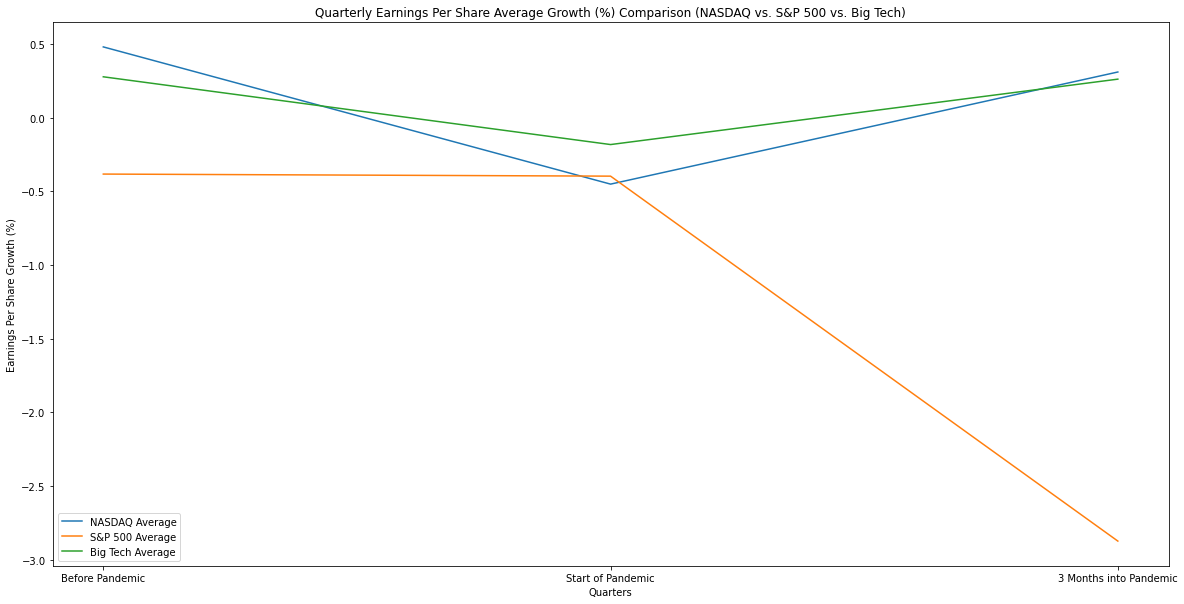

In [13]:
# EPS growth of S&P portfolio vs. EPS growth of Big Tech Companies
# over 3 quarters

# create the average EPS growth values for each quarter for NASDAQ, S&P 500, and Big Tech Companies
nasdaq_eps_values = [clean_nasdaq_df['Q1 EPS Growth'].mean(), clean_nasdaq_df['Q2 EPS Growth'].mean(), 
                     clean_nasdaq_df['Q3 EPS Growth'].mean()]

snp_eps_values = [clean_snp_df['Q1 EPS Growth'].mean(), clean_snp_df['Q2 EPS Growth'].mean(), 
                     clean_snp_df['Q3 EPS Growth'].mean()]

big_tech_eps_values = [big_tech_df['Q1 EPS Growth'].mean(), big_tech_df['Q2 EPS Growth'].mean(), 
                         big_tech_df['Q3 EPS Growth'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_eps_values, label='NASDAQ Average')
plt.plot(quarters, snp_eps_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_eps_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Earnings Per Share Growth (%)')
plt.legend(loc='best')
plt.title('Quarterly Earnings Per Share Average Growth (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('../graphs/eps_growth_comparison.png')
plt.show()

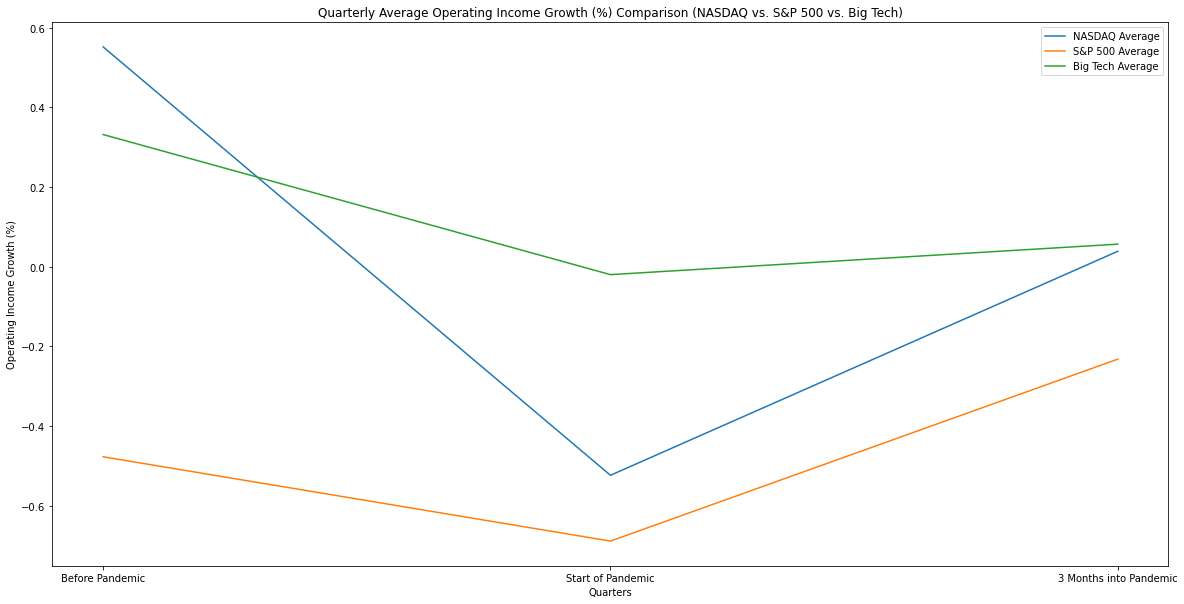

In [14]:
# create the average Operating Income growth values for each quarter for both NASDAQ and S&P 500
nasdaq_op_inc_values = [clean_nasdaq_df['Q1 Op Income Growth'].mean(), clean_nasdaq_df['Q2 Op Income Growth'].mean(), 
                     clean_nasdaq_df['Q3 Op Income Growth'].mean()]

snp_op_inc_values = [clean_snp_df['Q1 Op Inc Growth'].mean(), clean_snp_df['Q2 Op Inc Growth'].mean(), 
                     clean_snp_df['Q3 Op Inc Growth'].mean()]

big_tech_op_inc_values = [big_tech_df['Q1 Op Inc Growth'].mean(), big_tech_df['Q2 Op Inc Growth'].mean(), 
                         big_tech_df['Q3 Op Inc Growth'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_op_inc_values, label='NASDAQ Average')
plt.plot(quarters, snp_op_inc_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_op_inc_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Operating Income Growth (%)')
plt.legend(loc='best')
plt.title('Quarterly Average Operating Income Growth (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('../graphs/op_inc_growth_comparison.png')
plt.show()

In [15]:
# add price changes as percentage for S&P
for index, row in clean_snp_df.iterrows():
    clean_snp_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_snp_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_snp_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

dtale.show(clean_snp_df, ignore_duplicate=True)

In [16]:
# add price changes as percentage for Big Tech
for index, row in big_tech_df.iterrows():
    big_tech_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    big_tech_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    big_tech_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

dtale.show(big_tech_df, ignore_duplicate=True)

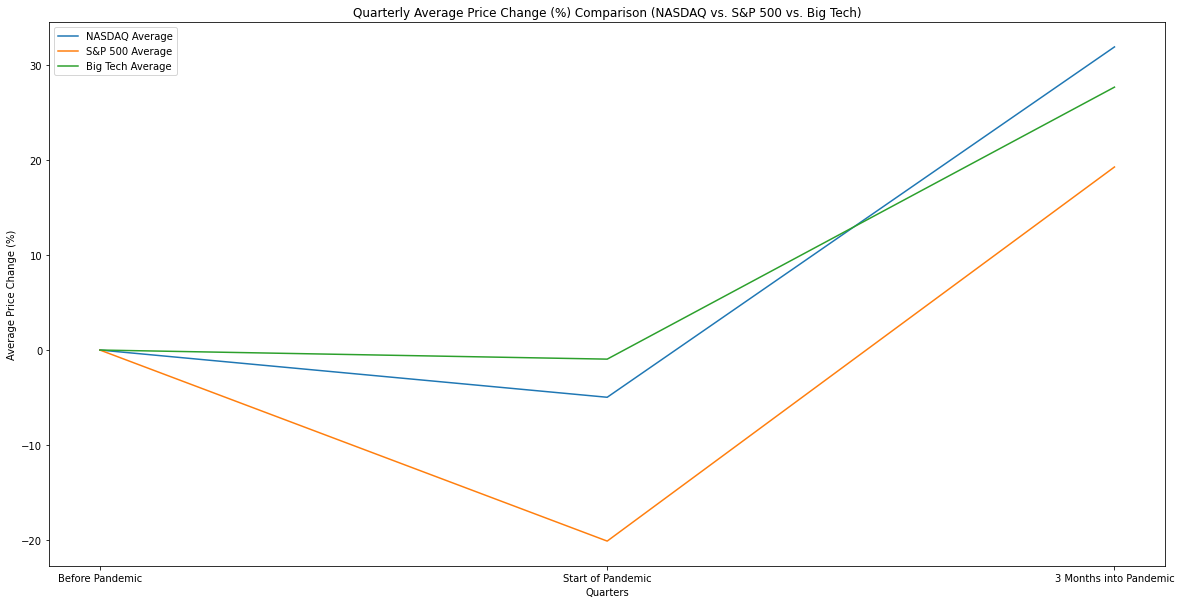

In [17]:
# Price Changes over 3 quarters: NASDAQ vs. S&P 500 vs. Big Tech
nasdaq_price_values = [clean_nasdaq_df['Q1 Price Change'].mean(), clean_nasdaq_df['Q2 Price Change'].mean(), 
                     clean_nasdaq_df['Q3 Price Change'].mean()]

snp_price_values = [clean_snp_df['Q1 Price Change'].mean(), clean_snp_df['Q2 Price Change'].mean(), 
                     clean_snp_df['Q3 Price Change'].mean()]

big_tech_price_values = [big_tech_df['Q1 Price Change'].mean(), big_tech_df['Q2 Price Change'].mean(), 
                         big_tech_df['Q3 Price Change'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_price_values, label='NASDAQ Average')
plt.plot(quarters, snp_price_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_price_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Average Price Change (%)')
plt.legend(loc='best')
plt.title('Quarterly Average Price Change (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('../graphs/price_change_comparison.png')
plt.show()

In [18]:
# creating p/e and roe lists

q1_pe = big_tech_df["Q1 P/E"].to_list()
q2_pe = big_tech_df["Q2 P/E"].to_list()
q3_pe = big_tech_df["Q3 P/E"].to_list()

q1_rev = big_tech_df["Q1 Rev Growth"].to_list()
q2_rev = big_tech_df["Q2 Rev Growth"].to_list()
q3_rev = big_tech_df["Q3 Rev Growth"].to_list()

final_pe = q1_pe + q2_pe + q3_pe
final_rev = q1_rev + q1_rev + q1_rev

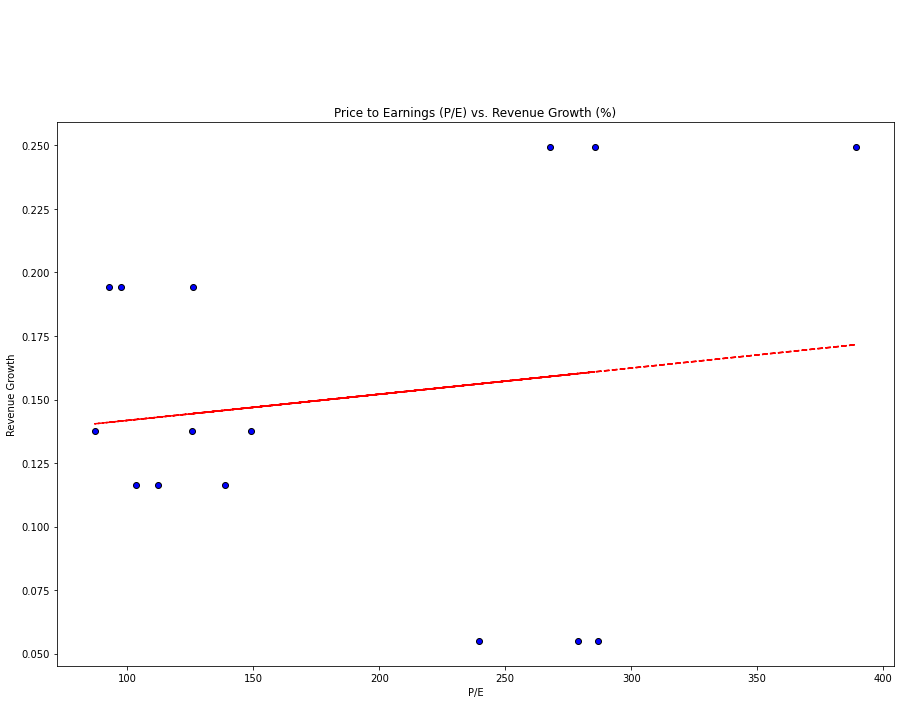

The rvalue is: 0.1435084652342412


In [19]:
x_values = np.array(final_pe)
y_values = np.array(final_rev)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(200, 0.30),fontsize=15, color="red")
plt.xlabel("P/E")
plt.ylabel("Revenue Growth")
plt.title("Price to Earnings (P/E) vs. Revenue Growth (%)")

plt.savefig("../graphs/pe_rev_growth_snp.png")
plt.show()
print(f"The rvalue is: {rvalue}")

In [20]:
q1_ROE_nasdaq = clean_nasdaq_df["Q1 ROE"].to_list() 
avg_roe_q1 = round(sum(q1_ROE_nasdaq) / len(q1_ROE_nasdaq) * 100, 2)

q2_ROE_nasdaq = clean_nasdaq_df["Q2 ROE"].to_list()
avg_roe_q2 = round(sum(q2_ROE_nasdaq) / len(q2_ROE_nasdaq) * 100, 2)

q3_ROE_nasdaq = clean_nasdaq_df["Q3 ROE"].to_list()
avg_roe_q3 = round(sum(q3_ROE_nasdaq) / len(q3_ROE_nasdaq) * 100, 2)

# S&P ROE 

q1_ROE_snp = clean_snp_df["Q1 ROE"].to_list()
avg_roe_q1_snp = round(sum(q1_ROE_snp) / len(q1_ROE_snp) * 100, 2)

q2_ROE_snp = clean_snp_df["Q2 ROE"].to_list()
avg_roe_q2_snp = round(sum(q2_ROE_snp) / len(q2_ROE_snp) * 100, 2)

q3_ROE_snp = clean_snp_df["Q3 ROE"].to_list()
avg_roe_q3_snp = round(sum(q3_ROE_snp) / len(q3_ROE_snp) * 100, 2)

# BIG TECH ROE

big_tech_q1 = big_tech_df["Q1 ROE"].to_list()
big_tech_q1_avg = round(sum(big_tech_q1) / len(big_tech_q1) * 100, 2)

big_tech_q2 = big_tech_df["Q2 ROE"].to_list()
big_tech_q2_avg = round(sum(big_tech_q2) / len(big_tech_q2) * 100, 2)

big_tech_q3 = big_tech_df["Q3 ROE"].to_list()
big_tech_q3_avg = round(sum(big_tech_q3) / len(big_tech_q3) * 100, 2)
print(avg_roe_q3)

9.78


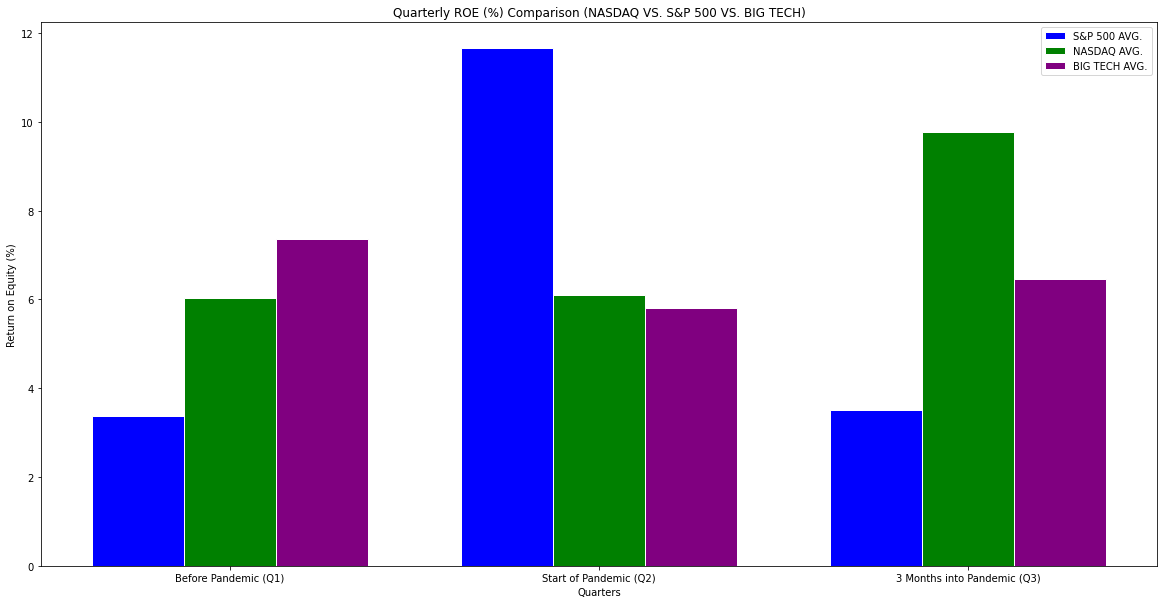

In [21]:
q1_snp = np.array([avg_roe_q1_snp, avg_roe_q2_snp, avg_roe_q3_snp])
q1_nasdaq = np.array([avg_roe_q1, avg_roe_q2, avg_roe_q3])
q1_tech = np.array([big_tech_q1_avg, big_tech_q2_avg, big_tech_q3_avg])

barWidth = 0.25
labels = ["Q1", "Q2", "Q3"]

x_axis = np.arange(len(labels))
#ig, ax = plt.subplots()


r1 = np.arange(len(x_axis))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.subplots(figsize=(20,10))
plt.bar(r1, q1_snp, color='blue', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r2, q1_nasdaq, color='green', width=barWidth, edgecolor='white', label='NASDAQ AVG.')
plt.bar(r3, q1_tech, color='purple', width=barWidth, edgecolor='white', label='BIG TECH AVG.')
plt.xticks([r + barWidth for r in range(len(labels))], ["Before Pandemic (Q1)", "Start of Pandemic (Q2)",
                                                        "3 Months into Pandemic (Q3)"])
plt.xlabel("Quarters")
plt.ylabel("Return on Equity (%)")
plt.title("Quarterly ROE (%) Comparison (NASDAQ VS. S&P 500 VS. BIG TECH)")
plt.legend(loc="best")
plt.savefig("../graphs/quarterly_roe_comparison.png")
plt.show()

In [32]:
clean_snp_df.loc[:, ["Sector", "Q1 ROE", "Q2 ROE", "Q3 ROE"]].head()

,Sector,Q1 ROE,Q2 ROE,Q3 ROE
0,Industrials,0.013629,0.011432,0.008816
1,Communication Services,0.068126,0.048330,0.033385
2,Consumer Staples,0.054127,0.081553,0.063259
3,Materials,0.024482,0.004890,0.039628
4,Health Care,0.067546,0.079619,-0.031752


In [37]:
new_df = clean_snp_df.loc[:, ["Sector", "Q1 ROE", "Q2 ROE", "Q3 ROE"]]
grouped_df = new_df.groupby(['Sector']).mean()
grouped_df = grouped_df.reset_index()
grouped_df

,Sector,Q1 ROE,Q2 ROE,Q3 ROE
0,Communication Services,0.034796,0.017485,-0.045723
1,Consumer Discretionary,0.078092,0.053339,0.111555
2,Consumer Staples,0.134952,-0.177398,0.301626
3,Energy,-0.113978,-0.074157,-0.040573
4,Financials,0.033905,0.340308,0.075888
5,Health Care,0.072945,0.075427,0.052505
6,Industrials,0.048830,0.034667,0.010888
7,Information Technology,-0.010379,0.416353,0.000323
8,Materials,-0.000821,-0.005372,-0.040867
9,Real Estate,0.032908,0.031174,0.021176


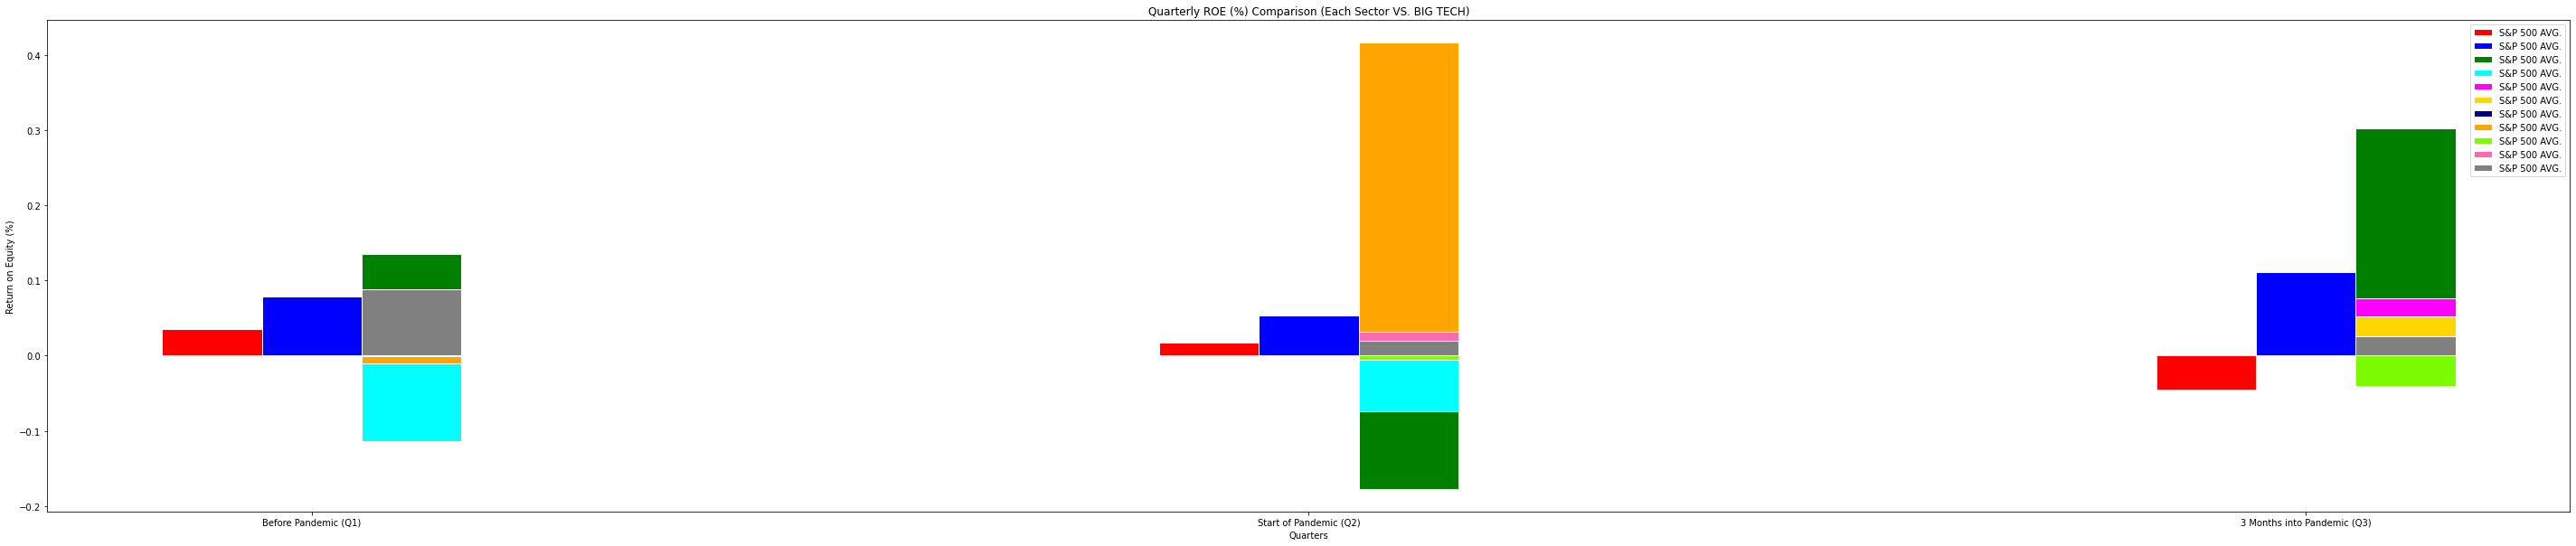

In [46]:
com_serv = np.array([grouped_df['Q1 ROE'][0], grouped_df['Q2 ROE'][0], grouped_df['Q3 ROE'][0]])
cons_disc = np.array([grouped_df['Q1 ROE'][1], grouped_df['Q2 ROE'][1], grouped_df['Q3 ROE'][1]])
cons_stap = np.array([grouped_df['Q1 ROE'][2], grouped_df['Q2 ROE'][2], grouped_df['Q3 ROE'][2]])
energy = np.array([grouped_df['Q1 ROE'][3], grouped_df['Q2 ROE'][3], grouped_df['Q3 ROE'][3]])
financials = np.array([grouped_df['Q1 ROE'][4], grouped_df['Q2 ROE'][4], grouped_df['Q3 ROE'][4]])
health = np.array([grouped_df['Q1 ROE'][5], grouped_df['Q2 ROE'][5], grouped_df['Q3 ROE'][5]])
industrials = np.array([grouped_df['Q1 ROE'][6], grouped_df['Q2 ROE'][6], grouped_df['Q3 ROE'][6]])
info_tech = np.array([grouped_df['Q1 ROE'][7], grouped_df['Q2 ROE'][7], grouped_df['Q3 ROE'][7]])
materials = np.array([grouped_df['Q1 ROE'][8], grouped_df['Q2 ROE'][8], grouped_df['Q3 ROE'][8]])
real_estate = np.array([grouped_df['Q1 ROE'][9], grouped_df['Q2 ROE'][9], grouped_df['Q3 ROE'][9]])
utilities = np.array([grouped_df['Q1 ROE'][10], grouped_df['Q2 ROE'][10], grouped_df['Q3 ROE'][10]])

#q1_nasdaq = np.array([avg_roe_q1, avg_roe_q2, avg_roe_q3])
#q1_tech = np.array([big_tech_q1_avg, big_tech_q2_avg, big_tech_q3_avg])

barWidth = 0.1
labels = ["Q1", "Q2", "Q3"]

x_axis = np.arange(len(labels))
#ig, ax = plt.subplots()


r1 = np.arange(len(x_axis))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r2]
r5 = [x + barWidth for x in r2]
r6 = [x + barWidth for x in r2]
r7 = [x + barWidth for x in r2]
r8 = [x + barWidth for x in r2]
r9 = [x + barWidth for x in r2]
r10 = [x + barWidth for x in r2]
r11 = [x + barWidth for x in r2]

plt.subplots(figsize=(50,10))

plt.bar(r1, com_serv, color='red', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r2, cons_disc, color='blue', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r3, cons_stap, color='green', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r3, energy, color='aqua', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r4, financials, color='magenta', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r5, health, color='gold', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r6, industrials, color='navy', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r7, info_tech, color='orange', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r8, materials, color='lawngreen', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r9, real_estate, color='hotpink', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r10, utilities, color='gray', width=barWidth, edgecolor='white', label='S&P 500 AVG.')

#plt.bar(r, q1_nasdaq, color='green', width=barWidth, edgecolor='white', label='NASDAQ AVG.')
#plt.bar(r, q1_tech, color='purple', width=barWidth, edgecolor='white', label='BIG TECH AVG.')
plt.xticks([r + barWidth for r in range(len(labels))], ["Before Pandemic (Q1)", "Start of Pandemic (Q2)",
                                                        "3 Months into Pandemic (Q3)"])



plt.xlabel("Quarters")
plt.ylabel("Return on Equity (%)")
plt.title("Quarterly ROE (%) Comparison (Each Sector VS. BIG TECH)")
plt.legend(loc="best")
#plt.savefig("../graphs/sectors_graph")